In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

/home/roshan/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


## Introduction to Regression

In regression tasks, the target value is a continuously varying variable, such as a country's GDP or the price of a house. Our first regression task will be using the Boston housing dataset!  
### Boston housing data

In [32]:
boston = pd.read_csv('boston.csv')

In [33]:
boston.head()


,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


The feature 'CRIM' is per capita crime rate, 'NX' is nitric oxides concentration, and 'RM' average number of rooms per dwelling, for example. The target variable, 'MEDV' is the median value of owner occupied homes in thousands of dollars. Now, given data as such, recall that scikit-learn wants 'features' and 'target' values in disticnt arrays, X and y. Thus, we split our DataFrame: in the first line here, we drop the target; in the second, we keep only the target.

### Creating feature and target arrays

In [34]:
X = boston.drop('MEDV', axis = 1).values

In [7]:
X

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [35]:
y = boston['MEDV'].values

In [9]:
y

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [90]:
y.shape

(506,)

Using the values attributes returns the NumPy arrays that we will use.

As a first task, let's try to predict the price from a single feature: the average number of rooms in a block.  
### Predicting house value from a single feature

In [10]:
X

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [93]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


To dot this, we slice out the number of rooms column of the array X, which is the fifth column into the variable X rooms.

In [94]:
X[:,5]

array([6.575, 6.421, 7.185, 6.998, 7.147, 6.43 , 6.012, 6.172, 5.631,
       6.004, 6.377, 6.009, 5.889, 5.949, 6.096, 5.834, 5.935, 5.99 ,
       5.456, 5.727, 5.57 , 5.965, 6.142, 5.813, 5.924, 5.599, 5.813,
       6.047, 6.495, 6.674, 5.713, 6.072, 5.95 , 5.701, 6.096, 5.933,
       5.841, 5.85 , 5.966, 6.595, 7.024, 6.77 , 6.169, 6.211, 6.069,
       5.682, 5.786, 6.03 , 5.399, 5.602, 5.963, 6.115, 6.511, 5.998,
       5.888, 7.249, 6.383, 6.816, 6.145, 5.927, 5.741, 5.966, 6.456,
       6.762, 7.104, 6.29 , 5.787, 5.878, 5.594, 5.885, 6.417, 5.961,
       6.065, 6.245, 6.273, 6.286, 6.279, 6.14 , 6.232, 5.874, 6.727,
       6.619, 6.302, 6.167, 6.389, 6.63 , 6.015, 6.121, 7.007, 7.079,
       6.417, 6.405, 6.442, 6.211, 6.249, 6.625, 6.163, 8.069, 7.82 ,
       7.416, 6.727, 6.781, 6.405, 6.137, 6.167, 5.851, 5.836, 6.127,
       6.474, 6.229, 6.195, 6.715, 5.913, 6.092, 6.254, 5.928, 6.176,
       6.021, 5.872, 5.731, 5.87 , 6.004, 5.961, 5.856, 5.879, 5.986,
       5.613, 5.693,

In [95]:
X_rooms = X[:,5]
#Both X_rooms and y are NumPy arrays.
print(type(X_rooms), type(y))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


To turn them into NumPy arrays of the desired shape, we apply the reshape method to keep the first dimension, but add another dimension of size one to X

In [96]:
X_rooms.shape

(506,)

In [97]:
X_rooms = X_rooms.reshape(-1,1)
y = y.reshape(-1,1)

In [36]:
X_rooms.shape

(506, 1)

In [37]:
pd.DataFrame(X_rooms)

,0
0,6.575
1,6.421
2,7.185
3,6.998
4,7.147
...,...
501,6.593
502,6.120
503,6.976
504,6.794


In [38]:
y.shape

(506, 1)

Now, let's plot house value as a function of number of rooms using matplotlib's .scatter

## Plotting house value vs. number of rooms


Text(0.5, 0, 'Number of rooms')

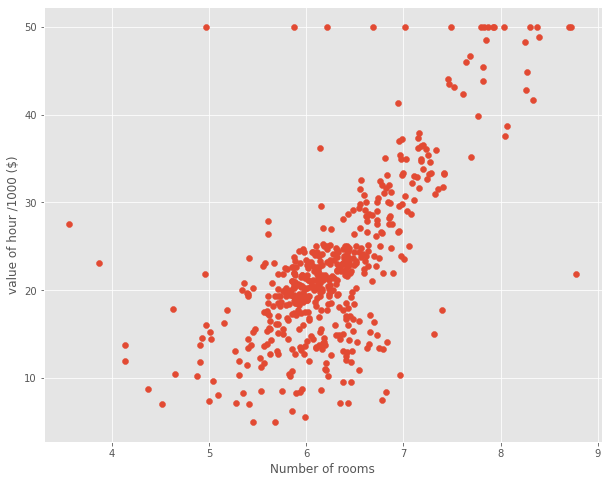

In [42]:

plt.style.use('ggplot')
plt.figure(figsize=(10,8))
plt.scatter(X_rooms, y)
plt.ylabel('value of hour /1000 ($)')
plt.xlabel('Number of rooms')


We can immediately see that, as one might expect, more rooms lead to higher prices

It's time to fit a regression model to our data. We're going to use a model called linear regression.

### Fitting a regression model

In [45]:
from sklearn.linear_model import LinearRegression
#instantiate LinearRegression as regr
reg = LinearRegression()
#We then fit the regression to the data using regr.fit and passing 
#in the data, the number of rooms and the target variable, the house price
reg.fit(X_rooms, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

After this, we want to check out the regressors predictions over the range of the data.

In [46]:
prediction_space = np.linspace(min(X_rooms), max(X_rooms)).reshape(-1,1)

In [47]:
prediction_space

array([[3.561     ],
       [3.6675102 ],
       [3.77402041],
       [3.88053061],
       [3.98704082],
       [4.09355102],
       [4.20006122],
       [4.30657143],
       [4.41308163],
       [4.51959184],
       [4.62610204],
       [4.73261224],
       [4.83912245],
       [4.94563265],
       [5.05214286],
       [5.15865306],
       [5.26516327],
       [5.37167347],
       [5.47818367],
       [5.58469388],
       [5.69120408],
       [5.79771429],
       [5.90422449],
       [6.01073469],
       [6.1172449 ],
       [6.2237551 ],
       [6.33026531],
       [6.43677551],
       [6.54328571],
       [6.64979592],
       [6.75630612],
       [6.86281633],
       [6.96932653],
       [7.07583673],
       [7.18234694],
       [7.28885714],
       [7.39536735],
       [7.50187755],
       [7.60838776],
       [7.71489796],
       [7.82140816],
       [7.92791837],
       [8.03442857],
       [8.14093878],
       [8.24744898],
       [8.35395918],
       [8.46046939],
       [8.566

Text(0.5, 0, 'Number of rooms')

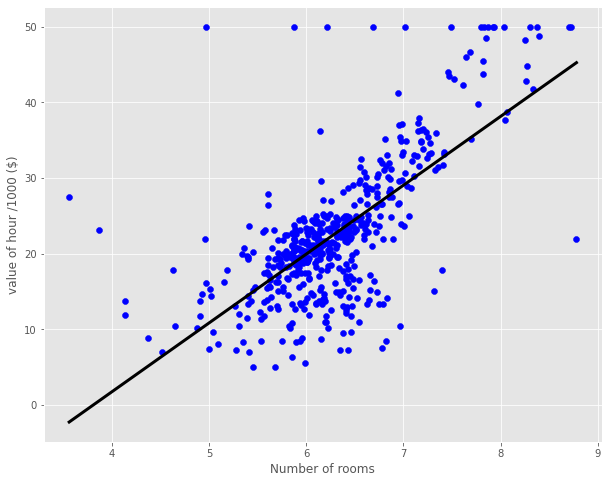

In [50]:
plt.figure(figsize = (10,8))
plt.scatter(X_rooms, y, color = 'blue')
plt.plot(prediction_space, reg.predict(prediction_space), color = 'black', linewidth = 3)
plt.ylabel('value of hour /1000 ($)')
plt.xlabel('Number of rooms')


### Which of the following is a regression problem?

Andy introduced regression to you using the Boston housing dataset. But regression models can be used in a variety of contexts to solve a variety of different problems.

Given below are four example applications of machine learning. Your job is to pick the one that is best framed as a regression problem.

**A bike share company using time and weather data to predict the number of bikes being rented at any given hour.**

### Importing data for supervised learning

In this chapter, you will work with Gapminder data that we have consolidated into one CSV file available in the workspace as 'gapminder.csv'. Specifically, your goal will be to use this data to predict the life expectancy in a given country based on features such as the country's GDP, fertility rate, and population. As in Chapter 1, the dataset has been preprocessed.

Since the target variable here is quantitative, this is a regression problem. To begin, you will fit a linear regression with just one feature: 'fertility', which is the average number of children a woman in a given country gives birth to. In later exercises, you will use all the features to build regression models.

Before that, however, you need to import the data and get it into the form needed by scikit-learn. This involves creating feature and target variable arrays. Furthermore, since you are going to use only one feature to begin with, you need to do some reshaping using NumPy's .reshape() method. Don't worry too much about this reshaping right now, but it is something you will have to do occasionally when working with scikit-learn so it is useful to practice.

In [13]:
df = pd.read_csv('gapminder.csv')

In [14]:
df = df.drop(columns = ['index', 'Region'])

In [15]:
df

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,75.5,15.4
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,72.5,20.0
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,81.5,5.2
...,...,...,...,...,...,...,...,...,...
134,3350832.0,2.11,0.5,2.489764,26.39123,15317.0,124.2604,76.0,13.0
135,26952719.0,2.46,0.1,4.476669,25.32054,3733.0,124.3462,68.7,49.2
136,86589342.0,1.86,0.4,1.479347,20.91630,4085.0,121.9367,75.4,26.2
137,13114579.0,5.88,13.6,0.148982,20.68321,3039.0,132.4493,52.0,94.9


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   population       139 non-null    float64
 1   fertility        139 non-null    float64
 2   HIV              139 non-null    float64
 3   CO2              139 non-null    float64
 4   BMI_male         139 non-null    float64
 5   GDP              139 non-null    float64
 6   BMI_female       139 non-null    float64
 7   life             139 non-null    float64
 8   child_mortality  139 non-null    float64
dtypes: float64(9)
memory usage: 9.9 KB


In [57]:
y = df['life']

In [65]:
type(y)

pandas.core.series.Series

In [66]:
y = np.array(y)

In [67]:
y.shape

(139,)

In [68]:
type(y)

numpy.ndarray

In [69]:
y.reshape(-1,1)

array([[75.3],
       [58.3],
       [75.5],
       [72.5],
       [81.5],
       [80.4],
       [70.6],
       [72.2],
       [68.4],
       [75.3],
       [70.1],
       [79.4],
       [70.7],
       [63.2],
       [67.6],
       [70.9],
       [61.2],
       [73.9],
       [73.2],
       [59.4],
       [57.4],
       [66.2],
       [56.6],
       [80.7],
       [54.8],
       [78.9],
       [75.1],
       [62.6],
       [58.6],
       [79.7],
       [55.9],
       [76.5],
       [77.8],
       [78.7],
       [61. ],
       [74. ],
       [70.1],
       [74.1],
       [56.7],
       [60.4],
       [74. ],
       [65.7],
       [79.4],
       [81. ],
       [57.5],
       [62.2],
       [72.1],
       [80. ],
       [62.7],
       [79.5],
       [70.8],
       [58.3],
       [51.3],
       [63. ],
       [61.7],
       [70.9],
       [73.8],
       [82. ],
       [64.4],
       [69.5],
       [76.9],
       [79.4],
       [80.9],
       [81.4],
       [75.5],
       [82.6],
       [66

In [105]:
y = df['life'].values
X = df['fertility'].values

# Print the dimensions of X and y before reshaping
print("Dimensions of y before reshaping: {}".format(y.shape))
print("Dimensions of X before reshaping: {}".format(X.shape))

# Reshape X and y
y = y.reshape(-1, 1)
X_fertility= X.reshape(-1, 1)

# Print the dimensions of X and y after reshaping
print("Dimensions of y after reshaping: {}".format(y.shape))
print("Dimensions of X after reshaping: {}".format(X_fertility.shape))


Dimensions of y before reshaping: (139,)
Dimensions of X before reshaping: (139,)
Dimensions of y after reshaping: (139, 1)
Dimensions of X after reshaping: (139, 1)


In [106]:
y

array([[75.3],
       [58.3],
       [75.5],
       [72.5],
       [81.5],
       [80.4],
       [70.6],
       [72.2],
       [68.4],
       [75.3],
       [70.1],
       [79.4],
       [70.7],
       [63.2],
       [67.6],
       [70.9],
       [61.2],
       [73.9],
       [73.2],
       [59.4],
       [57.4],
       [66.2],
       [56.6],
       [80.7],
       [54.8],
       [78.9],
       [75.1],
       [62.6],
       [58.6],
       [79.7],
       [55.9],
       [76.5],
       [77.8],
       [78.7],
       [61. ],
       [74. ],
       [70.1],
       [74.1],
       [56.7],
       [60.4],
       [74. ],
       [65.7],
       [79.4],
       [81. ],
       [57.5],
       [62.2],
       [72.1],
       [80. ],
       [62.7],
       [79.5],
       [70.8],
       [58.3],
       [51.3],
       [63. ],
       [61.7],
       [70.9],
       [73.8],
       [82. ],
       [64.4],
       [69.5],
       [76.9],
       [79.4],
       [80.9],
       [81.4],
       [75.5],
       [82.6],
       [66

In [107]:
X_fertility

array([[2.73],
       [6.43],
       [2.24],
       [1.4 ],
       [1.96],
       [1.41],
       [1.99],
       [1.89],
       [2.38],
       [1.83],
       [1.42],
       [1.82],
       [2.91],
       [5.27],
       [2.51],
       [3.48],
       [2.86],
       [1.9 ],
       [1.43],
       [6.04],
       [6.48],
       [3.05],
       [5.17],
       [1.68],
       [6.81],
       [1.89],
       [2.43],
       [5.05],
       [5.1 ],
       [1.91],
       [4.91],
       [1.43],
       [1.5 ],
       [1.89],
       [3.76],
       [2.73],
       [2.95],
       [2.32],
       [5.31],
       [5.16],
       [1.62],
       [2.74],
       [1.85],
       [1.97],
       [4.28],
       [5.8 ],
       [1.79],
       [1.37],
       [4.19],
       [1.46],
       [4.12],
       [5.34],
       [5.25],
       [2.74],
       [3.5 ],
       [3.27],
       [1.33],
       [2.12],
       [2.64],
       [2.48],
       [1.88],
       [2.  ],
       [2.92],
       [1.39],
       [2.39],
       [1.34],
       [2.

In [77]:
import seaborn as sns

### Exploring the Gapminder data

As always, it is important to explore your data before building models. On the right, we have constructed a heatmap showing the correlation between the different features of the Gapminder dataset, which has been pre-loaded into a DataFrame as df and is available for exploration in the IPython Shell. Cells that are in green show positive correlation, while cells that are in red show negative correlation. Take a moment to explore this: Which features are positively correlated with life, and which ones are negatively correlated? Does this match your intuition?

Then, in the IPython Shell, explore the DataFrame using pandas methods such as .info(), .describe(), .head().

In case you are curious, the heatmap was generated using Seaborn's heatmap function and the following line of code, where df.corr() computes the pairwise correlation between columns:

sns.heatmap(df.corr(), square=True, cmap='RdYlGn')

Once you have a feel for the data, consider the statements below and select the one that is not true. After this, Hugo will explain the mechanics of linear regression in the next video and you will be on your way building regression models!

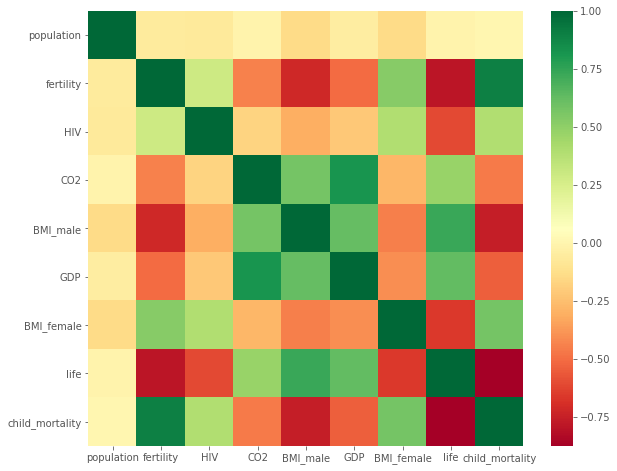

In [75]:
plt.figure(figsize = (10,8))
sns.heatmap(df.corr(), square=True, cmap='RdYlGn')

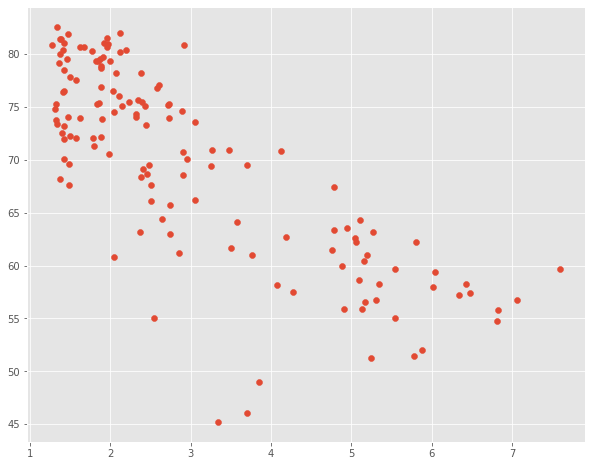

In [79]:
plt.figure(figsize = (10,8))
plt.scatter(X,y)

Text(0.5, 1.0, 'Life vs. Fertility ')

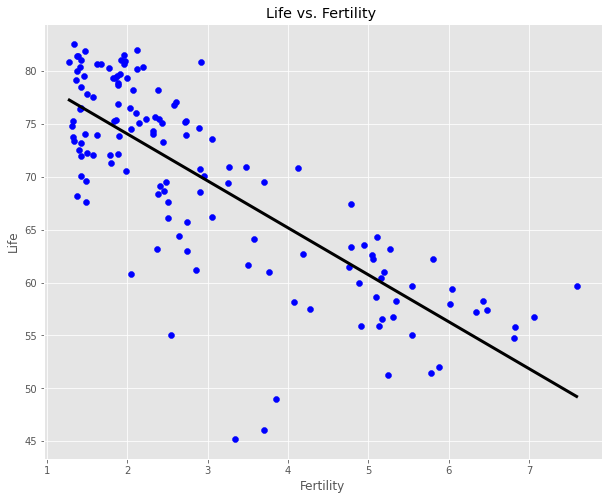

In [82]:
from sklearn.linear_model import LinearRegression
#instantiate LinearRegression as regr
regress = LinearRegression()
#We then fit the regression to the data using regress.fit and passing 
#in the data, fertility and the target variable, life
regress.fit(X, y)
predictionspace = np.linspace(min(X), max(X)).reshape(-1,1)
plt.figure(figsize = (10,8))
plt.scatter(X, y, color = 'blue')
plt.plot(predictionspace, regress.predict(predictionspace), color = 'black', linewidth = 3)
plt.ylabel('Life')
plt.xlabel('Fertility')
plt.title('Life vs. Fertility ')


## The basics of linear regression

Now, how does linear regression actually work?

### Regression mechanics  
We want to fit a line to the data and a line on two dimensions is always of the form y = ax+b, where y is the target, x is the single feature, and a and b are the parameters of the model that we want to learn. So, the question of fitting is reduced to: how do we choose a and b? A common method to define an error function for any given line and then to choose the line that minimizes the error function. Such an error function is also called a loss or a cost function. What will our loss function be? Intuitively, we want the line to be as close to the actual data points as possible. For this reason, we wish to minimize the vertical distance between the fit and the data. So for each data point, we calculate the vertical distance between it and the line. 
<img src = 'r1.png'>

This distance is called a residual. Now, we could try to minimize the sum of the residuals, but then a large postive residual would cancel out a large neagtive residual. For this reason we minimize the sum of the squares of the residuals.This will be our loss function and using this loss function is commonly called ordinary least squares, or OLS for short. Note that this is the same as minimizing the mean squared error of the predictions on the training set. When you call a fit on a linear regression model in scikit-learn, it performs this OLS under the hood.  
    <img src = 'r2.png'>

### Linear regression in higher dimensions

When we have two features and one target, a line is of the form $$y=a_1x_1+a_2x_2 +b$$, so to fit a linear regression model is to specify three variables $a_1$, $a_2$, and b.

To fit a linear regression model here:  
* Need to specify 3 variables

In higher dimensions, that is, when we have more than one or two features, a line of this form $$y=a_1x_1+a_2x_2+a_3x_3+ .. + a_nx_n+b$$ So, fitting a linear regression model is to specify a coefficient $a_i$, for each feature, as well as the variable, b.

The scikit-learn API works exactly the same in this case: you pass the fit method, two arrays: one containing the features, the other the target variable.

### Linear regression on all features

In [98]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
reg_all = LinearRegression()
reg_all.fit(X_train, y_train)
y_pred = reg_all.predict(X_test)
reg_all.score(X_test, y_test)

0.7112260057484925

In this code, we are working with all the features from the Boston Housing dataset. We split it into training and test sets; we instantiate the regressor; reg_all = LinearRegression(), fit it on the training set and predict on the test set. We saw that, in the world of classification, we could use accuracy as a metric of model performance. The default scoring method for linear regression is called R squared. Intuitively, this metric quantifies the amount of variance in the target variable that is predicted from the feature variables. To compute the R squared, we once again apply the method score to the model and pass it two arguments: the test data and the test data target. **Note that generally you will never use linear regression out of the box like this; you will most likely wish to use regularization, which we'll see soon and which places further constraints on the model coefficients.** Using regularized linear models

### Fit & predict for regression

Now, you will fit a linear regression and predict life expectancy using just one feature. You saw Andy do this earlier using the 'RM' feature of the Boston housing dataset. In this exercise, you will use the 'fertility' feature of the Gapminder dataset. Since the goal is to predict life expectancy, the target variable here is 'life'. The array for the target variable has been pre-loaded as y and the array for 'fertility' has been pre-loaded as X_fertility.

A scatter plot with 'fertility' on the x-axis and 'life' on the y-axis has been generated. As you can see, there is a strongly negative correlation, so a linear regression should be able to capture this trend. Your job is to fit a linear regression and then predict the life expectancy, overlaying these predicted values on the plot to generate a regression line. You will also compute and print the $R^2$
score using sckit-learn's .score() method.

Text(0, 0.5, 'Life Expectancy')

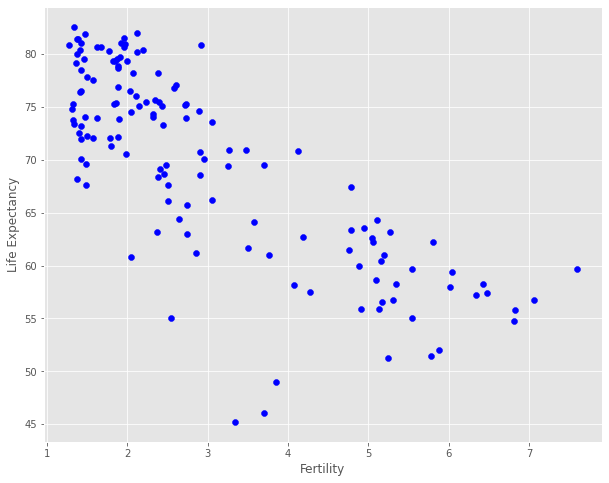

In [110]:
plt.figure(figsize = (10,8))
plt.scatter(X_fertility,y, color = 'b')
plt.xlabel('Fertility')
plt.ylabel('Life Expectancy')

* Import LinearRegression from sklearn.linear_model.
* Create a LinearRegression regressor called reg.
* Set up the prediction space to range from the minimum to the maximum of X_fertility. This has been done for you.
* Fit the regressor to the data (X_fertility and y) and compute its predictions using the .predict() method and the prediction_space array.
* Compute and print the $R^2$ score using the .score() method.
* Overlay the plot with your linear regression line. This has been done for you, so hit 'Submit Answer' to see the result!

0.6192442167740035


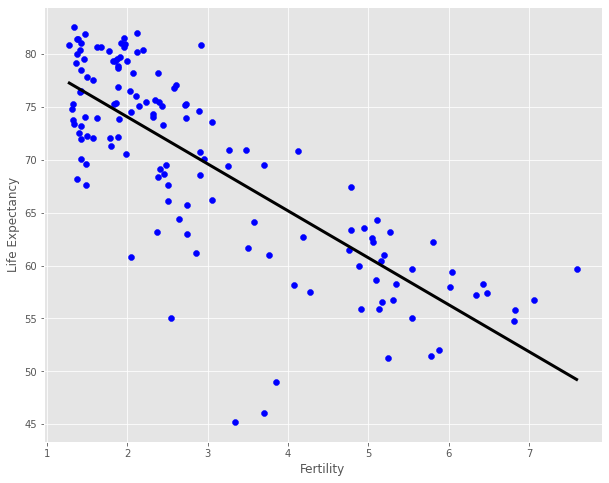

In [116]:
# Import LinearRegression
from sklearn.linear_model import LinearRegression

# Create the regressor: reg
reg = LinearRegression()

# Create the prediction space
prediction_space = np.linspace(min(X_fertility), max(X_fertility)).reshape(-1,1)

# Fit the model to the data
reg.fit(X_fertility, y)

# Compute predictions over the prediction space: y_pred
y_pred = reg.predict(X_fertility)

# Print R^2 
print(reg.score(X_fertility, y))

# Plot regression line
plt.figure(figsize = (10,8))
plt.scatter(X_fertility,y, color = 'b')
plt.plot(prediction_space, reg.predict(prediction_space), color='black', linewidth=3)
plt.xlabel('Fertility')
plt.ylabel('Life Expectancy')
plt.show()
#  Notice how the line captures the underlying trend in the data. 
# And the performance is quite decent for this basic regression model with only one feature!

### Train/test split for regression

As you learned in Chapter 1, train and test sets are vital to ensure that your supervised learning model is able to generalize well to new data. This was true for classification models, and is equally true for linear regression models.

In this exercise, you will split the Gapminder dataset into training and testing sets, and then fit and predict a linear regression over all features. In addition to computing the R2
score, you will also compute the Root Mean Squared Error (RMSE), which is another commonly used metric to evaluate regression models. The feature array X and target variable array y have been pre-loaded for you from the DataFrame df.

In [133]:

X = df.drop('life', axis = 1).values

In [134]:
X.shape

(139, 8)

In [135]:
y = df['life'].values.reshape(-1,1)

In [137]:
y

array([[75.3],
       [58.3],
       [75.5],
       [72.5],
       [81.5],
       [80.4],
       [70.6],
       [72.2],
       [68.4],
       [75.3],
       [70.1],
       [79.4],
       [70.7],
       [63.2],
       [67.6],
       [70.9],
       [61.2],
       [73.9],
       [73.2],
       [59.4],
       [57.4],
       [66.2],
       [56.6],
       [80.7],
       [54.8],
       [78.9],
       [75.1],
       [62.6],
       [58.6],
       [79.7],
       [55.9],
       [76.5],
       [77.8],
       [78.7],
       [61. ],
       [74. ],
       [70.1],
       [74.1],
       [56.7],
       [60.4],
       [74. ],
       [65.7],
       [79.4],
       [81. ],
       [57.5],
       [62.2],
       [72.1],
       [80. ],
       [62.7],
       [79.5],
       [70.8],
       [58.3],
       [51.3],
       [63. ],
       [61.7],
       [70.9],
       [73.8],
       [82. ],
       [64.4],
       [69.5],
       [76.9],
       [79.4],
       [80.9],
       [81.4],
       [75.5],
       [82.6],
       [66

* Import LinearRegression from sklearn.linear_model, mean_squared_error from sklearn.metrics, and train_test_split from sklearn.model_selection.
* Using X and y, create training and test sets such that 30% is used for testing and 70% for training. Use a random state of 42.
* Create a linear regression regressor called reg_all, fit it to the training set, and evaluate it on the test set.
* Compute and print the $R^2$ score using the .score() method on the test set.
* Compute and print the RMSE. To do this, first compute the Mean Squared Error using the mean_squared_error() function with the arguments y_test and y_pred, and then take its square root using np.sqrt().


In [138]:
# Import necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

# Create the regressor: reg_all
reg_all = LinearRegression()

# Fit the regressor to the training data
reg_all.fit(X_train, y_train)

# Predict on the test data: y_pred
y_pred = reg_all.predict(X_test)

# Compute and print R^2 and RMSE
print("R^2: {}".format(reg_all.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))


R^2: 0.8380468731429358
Root Mean Squared Error: 3.2476010800377235


Excellent! Using all features has improved the model score. This makes sense, as the model has more information to learn from. However, there is one potential pitfall to this process. Can you spot it? You'll learn about this as well how to better validate your models in the next video!

### Cross-validation

You are now also becoming more acquainted with train test split and computing model performance metrics on your test set. Can you spot a potential pitfall of this process? Well, let's think about it for a bit:   
### Cross-validation motivation  
If you're computing R squared on your test set, the R squared returned is dependent on the way that you split up the data! The data points in the test set may have some peculiarities that mean the R squared comouted on it is not representative of the model's ability to generalize to unseen data. To combat this dependence on what is essentially an arbitrary split, we use a technique called cross-validation.  
* Model performance is dependent on way the data is split
* Not representative of the model's ability to generalize
* Solution: Cross-validation!

### Cross-validation basics  
split 1..... Fold1    Fold2    Fold3    Fold4    Fold5  

We begin by splitting the dataset into five groups or folds.  
split 1..... **Fold1**    Fold2    Fold3    Fold4    Fold5  
Thenm, we hold out the first fold as a test set, fit our model on the remaining four folds, predict on the test set, and compute the metric of interest.

split 2..... Fold1    **Fold2**    Fold3    Fold4    Fold5   
Next, we hold out the second fold as our test set, fit on the remaining data, predict on the test set, and compute the metric of interest. Then similarly with the third, fourth, and fifth fold  
split 3..... Fold1    Fold2    **Fold3**    Fold4    Fold5  
split 4..... Fold1    Fold2   Fold3    **Fold4**    Fold5  
split 5..... Fold1    Fold2    Fold3    Fold4    **Fold5**  

<img src = "r3.png">

As a result, we get five values of R squared from which we can compute statistics of interest, such as the mean and median and 95% confidence intervals. As we split the dataset into five folds, we call this process 5-fold cross validation. If you use 10 folds, it is called 10-fold cross validation. More generally, if you use k folds, it is called k-fold cross validation or k-fold CV. There is, however, a trade-off as using more folds is more computationally expensive. This is because you are fitting and predicting more times. This method avoids the problem of your metric of choice being dependent on the train test split.

### Cross-validation in scikit-learn

In [11]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
# We instantiate our model, in this case, a regressor
reg = LinearRegression()
# We then call cross_val_score with the regressor, the feature data
# and the target data as the first three positional arguments.
# We also specify the number of folds with the keyword argument, cv.
# This returns an array of cross-validation scoresm which we assign to cv
# results. The length of the array is the number of folds utilized.
# Note that the score reported is R squared, as this is the default score
# for linear regression
cv_results = cross_val_score(reg, X, y, cv =5)
print(cv_results) # Print the R2 scores

[ 0.63919994  0.71386698  0.58702344  0.07923081 -0.25294154]


In [12]:
# we can also, for example, compute the mean
np.mean(cv_results)

0.3532759243958766

In [22]:
df

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,75.5,15.4
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,72.5,20.0
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,81.5,5.2
...,...,...,...,...,...,...,...,...,...
134,3350832.0,2.11,0.5,2.489764,26.39123,15317.0,124.2604,76.0,13.0
135,26952719.0,2.46,0.1,4.476669,25.32054,3733.0,124.3462,68.7,49.2
136,86589342.0,1.86,0.4,1.479347,20.91630,4085.0,121.9367,75.4,26.2
137,13114579.0,5.88,13.6,0.148982,20.68321,3039.0,132.4493,52.0,94.9


In [23]:
X = df.drop('life', axis = 1).values

In [24]:
len(X)

139

In [25]:
X.shape

(139, 8)

In [26]:
y = df['life'].values.reshape(-1,1)

In [27]:
y.shape


(139, 1)

### 5-fold cross-validation

Cross-validation is a vital step in evaluating a model. It maximizes the amount of data that is used to train the model, as during the course of training, the model is not only trained, but also tested on all of the available data.

In this exercise, you will practice 5-fold cross validation on the Gapminder data. By default, scikit-learn's cross_val_score() function uses R2

as the metric of choice for regression. Since you are performing 5-fold cross-validation, the function will return 5 scores. Your job is to compute these 5 scores and then take their average.

The DataFrame has been loaded as df and split into the feature/target variable arrays X and y. The modules pandas and numpy have been imported as pd and np, respectively.


* Import LinearRegression from sklearn.linear_model and cross_val_score from sklearn.model_selection.
* Create a linear regression regressor called reg.
* Use the cross_val_score() function to perform 5-fold cross-validation on X and y.
* Compute and print the average cross-validation score. You can use NumPy's mean() function to compute the average.


In [28]:
# Import the necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# Create a linear regression object: reg
reg = LinearRegression()

# Compute 5-fold cross-validation scores: cv_scores
cv_scores = cross_val_score(reg, X, y, cv = 5)

# Print the 5-fold cross-validation scores
print(cv_scores)

print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))


[0.81720569 0.82917058 0.90214134 0.80633989 0.94495637]
Average 5-Fold CV Score: 0.8599627722793233


Now that you have cross-validated your model, you can more confidently evaluate its predictions.

## K-Fold CV comparison

Cross validation is essential but do not forget that the more folds you use, the more computationally expensive cross-validation becomes. In this exercise, you will explore this for yourself. Your job is to perform 3-fold cross-validation and then 10-fold cross-validation on the Gapminder dataset.

In the IPython Shell, you can use %timeit to see how long each 3-fold CV takes compared to 10-fold CV by executing the following cv=3 and cv=10:

%timeit cross_val_score(reg, X, y, cv = ____)

pandas and numpy are available in the workspace as pd and np. The DataFrame has been loaded as df and the feature/target variable arrays X and y have been created.


    Import LinearRegression from sklearn.linear_model and cross_val_score from sklearn.model_selection.
    Create a linear regression regressor called reg.
    Perform 3-fold CV and then 10-fold CV. Compare the resulting mean scores.


In [31]:
# Import necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# Create a linear regression object: reg
reg = LinearRegression()

# Perform 3-fold CV
%timeit cross_val_score(reg, X, y, cv = 3 )
cvscores_3 = cross_val_score(reg, X, y, cv = 3 )
print(np.mean(cvscores_3))

# Perform 10-fold CV
%timeit cross_val_score(reg, X, y, cv = 10 )
cvscores_10 = cross_val_score(reg, X, y, cv = 10 )
print(np.mean(cvscores_10))


2.66 ms ± 71.7 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
0.8718712782622111
11 ms ± 3.06 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
0.8436128620131201


### Did you use %timeit in the IPython Shell to see how much longer it takes 10-fold cross-validation to run compared to 3-fold cross-validation?

In [37]:
X = boston.drop('MEDV', axis = 1).values


In [44]:
y = y.reshape(-1,1)

In [45]:
X

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

## Regularized Regression
### Why regularize?

Recall that what fitting a linear regression does is minimize a loss function to choose a coefficient $a_i$ for each feature variable. If we allow these coefficients of parameters to be super large, we can get overfitting. It isn't so easy to see in two dimensions, but when you have loads and loads of features, that is, if your data sit in a high-dimensional space with large coefficients, it gets easy to predict nearly anything. For this reason, it is common practice to alter the loss function so that it penalizes for large coefficients. This is called regularization. The first type of regularized regression that we'll look at is called **ridge regression** in which our loss function is the standard OLS loss function plus the squared value of each coefficient multiplied by some constant alpha  
Loss function = OLS loss function + $\alpha * \sum_{i=1}^{n}a_i^2$  
Thus, when minimizing the loss function to fit to our data, models are penalized for coefficients with a large magnitude: large positive and large negative coefficients, that is. Not that alpha $\alpha$ is a parameter we need to choose in order to fit and predict. Essentially, we can select the alpha for which our model performs best. Picking alpha $\alpha$ for ridgr regression is similar to picking k in KNN. This is called hyperparameter tuning and we'll see much more of this soon. This alpha, which you may also see called lambda in the wild, can be thought of as a parameter that controls model complexity. Notice that when alpha is equal to zero, we get back OLS(Can lead to overfitting). Large coefficients in this case are not penalized and the overfitting problem is not accounted for. A very high alpha means that large coefficients are significantly penalized, which can lead to a model that is too simple and ends up underfitting the data.  
* Very high alpha ($\alpha$): Can lead to underfitting  
The method of performing ridge regression with scikit-learn mirrors the other models that we have seen.

### Ridge regression in scikit-learn

In [46]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
# we split our data into test and train, fit on the training, and
# predict on the test


In [48]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [50]:
ridge = Ridge(alpha = 0.1, normalize=True)
'''Note that we set alpha using the keyword argument alpha. Also notice
the argument normalize: setting this equal to True ensures that all our
variables are on the same scale and we will cover this in more depth later.'''

'Note that we set alpha using the keyword argument alpha. Also notice\nthe argument normalize: setting this equal to True ensures that all our\nvariables are on the same scale and we will cover this in more depth later.'

In [51]:
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)
ridge.score(X_test, y_test)

0.6996938275127313

There is another type of regularized regression called lasso regression.  
### Lasso regression

Loss function = OLS loss function + $\alpha* \sum_{i=1}^{i=n}\left | a_i \right |$

In lasso regression, the loss function is the standard OLS function plus the absolute value of each coefficient multiplied by some constant alpha.

In [54]:
from sklearn.linear_model import Lasso
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state =42)
lasso = Lasso(alpha=0.1, normalize=True)
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)
lasso.score(X_test, y_test)

0.5950229535328551

### Lasso regression  for feature selection

One of the really cool aspects of lasso regression is that it can be used to select important features of a dataset.  
* Can be used to select important features of a dataset  
This is because it tends to shrink the coefficients of less important features to be exactly zero.  
* Shrinks the coefficients of less important features to exactly 0

### Lasso for feature selection in scikit-learn

In [55]:
boston.drop('MEDV', axis =1).columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

Text(0, 0.5, 'Coefficients')

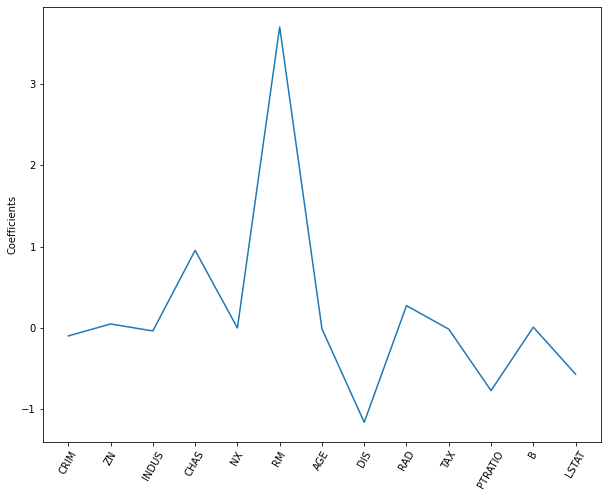

In [58]:
from sklearn.linear_model import Lasso
# We import Lasso as before and store the features names in
# the variable names
names = boston.drop('MEDV', axis = 1).columns
# We then instantiate our regressor, fit it to the data as always
lasso = Lasso(alpha = 0.1)

# Then we can extract the coef attribute and store in lasso coef
lasso_coef = lasso.fit(X,y).coef_
# Plotting the coefficients as a function of feature name yields this figure
plt.figure(figsize = (10,8))
plt.plot(range(len(names)), lasso_coef)
plt.xticks(range(len(names)), names, rotation = 60)
plt.ylabel('Coefficients')

You can see directly that the most important predictor for our target variable, housing price, is number of room! This is not surprising and is a great sanity check. This type of feature selection is very important for machine learning in an industry or business setting because it allows you, as a Data Scientist, to communicate important results to non-technical colleagues and bosses. The power of reporting important features from a linear model cannot be overestimated. **It is also valuable in research science, in order to identify which factors are important predictors for various physical phenomena.**

### Regularization I: Lasso

In the video, you saw how Lasso selected out the 'RM' feature as being the most important for predicting Boston house prices, while shrinking the coefficients of certain other features to 0. Its ability to perform feature selection in this way becomes even more useful when you are dealing with data involving thousands of features.

In this exercise, you will fit a lasso regression to the Gapminder data you have been working with and plot the coefficients. Just as with the Boston data, you will find that the coefficients of some features are shrunk to 0, with only the most important ones remaining.

The feature and target variable arrays have been pre-loaded as X and y.

In [59]:
df = pd.read_csv('gapminder.csv')

In [60]:
df = df.drop(columns = ['index', 'Region'])

In [61]:
X = df.drop('life', axis = 1).values

In [62]:
y = df['life'].values.reshape(-1,1)

In [63]:
X.shape


(139, 8)

In [64]:
y.shape


(139, 1)


    Import Lasso from sklearn.linear_model.
    Instantiate a Lasso regressor with an alpha of 0.4 and specify normalize=True.
    Fit the regressor to the data and compute the coefficients using the coef_ attribute.
    Plot the coefficients on the y-axis and column names on the x-axis. This has been done for you, so hit 'Submit Answer' to view the plot!


[-0.         -0.         -0.          0.          0.          0.
 -0.         -0.07087587]


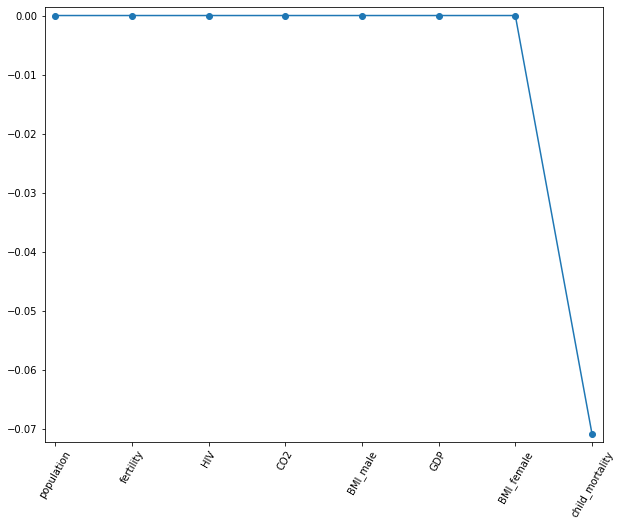

In [78]:
# Import Lasso
from sklearn.linear_model import Lasso

# Instantiate a lasso regressor: lasso
lasso = Lasso(alpha = 0.4, normalize = True)

# Fit the regressor to the data
lasso.fit(X,y)

# Compute and print the coefficients
lasso_coef = lasso.fit(X,y).coef_
print(lasso_coef)
df_columns = df.drop(columns = ['life']).columns

# Plot the coefficients
plt.figure(figsize = (10,8))
plt.plot(range(len(df_columns)), lasso_coef, marker = 'o')
plt.xticks(range(len(df_columns)), df_columns.values, rotation=60)
plt.margins(0.02)
plt.show()



According to the lasso algorithm, it seems like 'child_mortality' is the most important feature when predicting life expectancy.

In [68]:
df.columns

Index(['population', 'fertility', 'HIV', 'CO2', 'BMI_male', 'GDP',
       'BMI_female', 'life', 'child_mortality'],
      dtype='object')

In [74]:
df.drop(columns = ['life']).columns.values




array(['population', 'fertility', 'HIV', 'CO2', 'BMI_male', 'GDP',
       'BMI_female', 'child_mortality'], dtype=object)

### Regularization II: Ridge

Lasso is great for feature selection, but when building regression models, Ridge regression should be your first choice.

Recall that lasso performs regularization by adding to the loss function a penalty term of the absolute value of each coefficient multiplied by some alpha. This is also known as L1
regularization because the regularization term is the L1

norm of the coefficients. This is not the only way to regularize, however.

If instead you took the sum of the squared values of the coefficients multiplied by some alpha - like in Ridge regression - you would be computing the L2
norm. In this exercise, you will practice fitting ridge regression models over a range of different alphas, and plot cross-validated $R^2$ scores for each, using this function that we have defined for you, which plots the $R^2$ score as well as standard error for each alpha:

In [86]:
def display_plot(cv_scores, cv_scores_std):
    plt.style.use('ggplot')
    fig = plt.figure(figsize = (10,8))
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space, cv_scores)

    std_error = cv_scores_std / np.sqrt(10)

    ax.fill_between(alpha_space, cv_scores + std_error, cv_scores - std_error, alpha=0.2)
    ax.set_ylabel('CV Score +/- Std Error')
    ax.set_xlabel('Alpha')
    ax.axhline(np.max(cv_scores), linestyle='--', color='.5')
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale('log')
    plt.show()
    plt.clf()

Don't worry about the specifics of the above function works. The motivation behind this exercise is for you to see how the R2 score varies with different alphas, and to understand the importance of selecting the right value for alpha. You'll learn how to tune alpha in the next chapter.

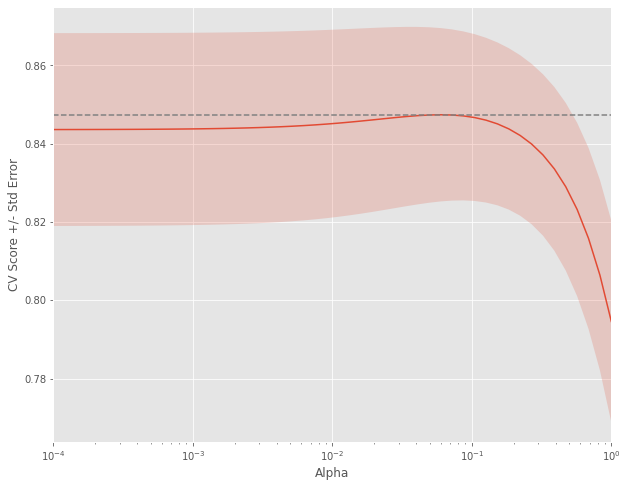

<Figure size 432x288 with 0 Axes>

In [88]:
# Import necessary modules
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# Setup the array of alphas and lists to store scores
alpha_space = np.logspace(-4, 0, 50)
ridge_scores = []
ridge_scores_std = []

# Create a ridge regressor: ridge
ridge = Ridge(normalize = True)

# Compute scores over range of alphas
for alpha in alpha_space:

    # Specify the alpha value to use: ridge.alpha
    ridge.alpha = alpha
    
    # Perform 10-fold CV: ridge_cv_scores
    ridge_cv_scores = cross_val_score(ridge, X,y, cv = 10)
    
    # Append the mean of ridge_cv_scores to ridge_scores
    ridge_scores.append(np.mean(ridge_cv_scores))
    
    # Append the std of ridge_cv_scores to ridge_scores_std
    ridge_scores_std.append(np.std(ridge_cv_scores))

# Display the plot
display_plot(ridge_scores, ridge_scores_std)


Great work! Notice how the cross-validation scores change with different alphas. Which alpha should you pick? How can you fine-tune your model? You'll learn all about this in the next chapter!